In [2]:
import numpy as np
from numpy import load
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from scipy import signal

%matplotlib inline

# Task 1

## Point A

In [3]:
data = load('data_ps1.npz')
data

NpzFile 'data_ps1.npz' with keys: environment, rod

The visualization of the map:

Text(0.5, 1.0, 'The environment')

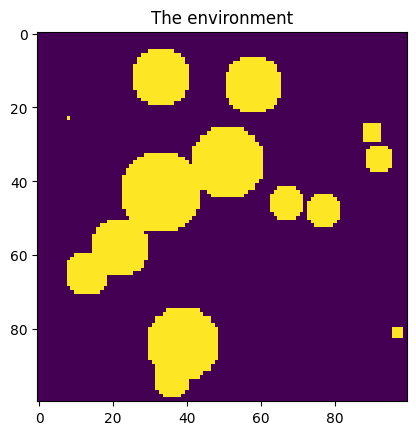

In [8]:
plt.imshow(data["environment"])
plt.title("The environment")

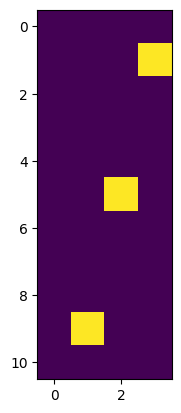

In [105]:
plt.imshow(data["rod"][1])

## Point B

In [5]:
def plot_enviroment(img: np.ndarray, obj: np.ndarray, state: tuple):
    """
    @param img: original image in 2d
    @param obj: is the 3d array of different configurations
    @param state: is the current pose (x, y, orientation) of the object

    @return: the merged image
    """
    dims = obj.shape
    dim_x = int((dims[0] - 1) / 2)
    dim_y = int((dims[1] - 1) / 2)
    merged_img = np.copy(img)
    merged_img[state[0] - dim_x:state[0] + dim_x + 1, state[1] - dim_y:state[1] + dim_y + 1] += obj[:, :, state[2]] * 0.5
    return merged_img

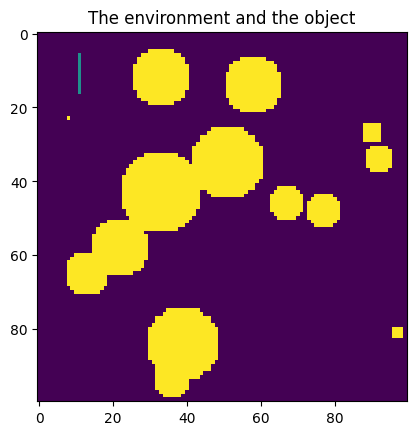

In [7]:
b = plot_enviroment(data["environment"], data["rod"], (11, 11, 2))
plt.title("The environment and the object")
plt.imshow(b)

## Point C

Create the C-space for the 2D environment map. For this, plot all the images corresponding to each
of the orientations by using collision checking.

*hint*: you might want to look at the library scipy.signal and use function signal.convolve2d(env_map,
kernel, boundary=’symm’, mode=’same’) to check for collisions.

*hint*: you may want to use normalize_image(img) from utils.py to normalize created space to {0, 1},
since after convolutions, values are not exactly 0 and 1 (this will be useful for task 2).

In [11]:
def normalize_image(img: np.ndarray, threshold: float = 0.1):
    """
    normalize the image to be between 0 and 1
    """
    dims = img.shape
    env = np.ones(dims)
    z = np.where(img < threshold)
    env[z] = 0.0
    return env

In [114]:
data["rod"]

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.],
      

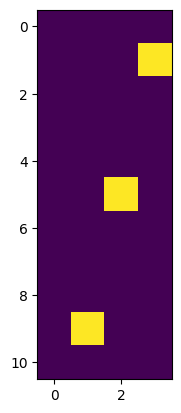

In [101]:
plt.imshow(data["rod"][1])

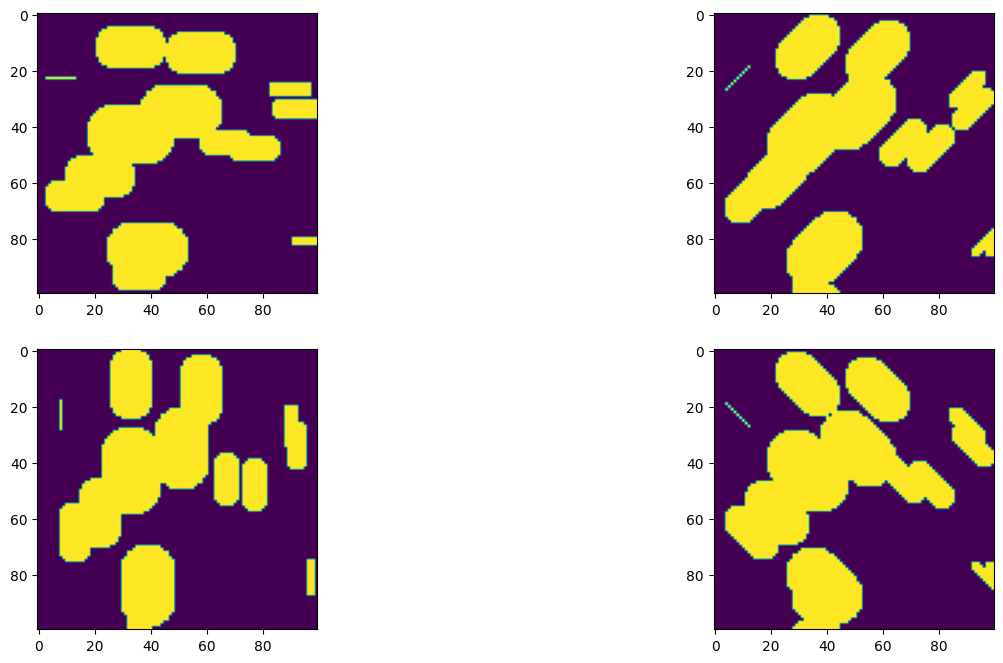

In [109]:
def c_space_plot(ax, env):
    ax.imshow(env)
    #ax.set_xlabel('x-label', fontsize=12)
    #ax.set_ylabel('y-label', fontsize=12)
    #ax.set_title('Title', fontsize=14)

c = []

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), layout=None)


for i in range(4):
    c.append(normalize_image(signal.convolve2d(data["environment"], data["rod"][:, :, i], boundary="symm", mode="same")))

k = 0
for ax in axs.flat:
    c_space_plot(ax, c[k])
    k += 1

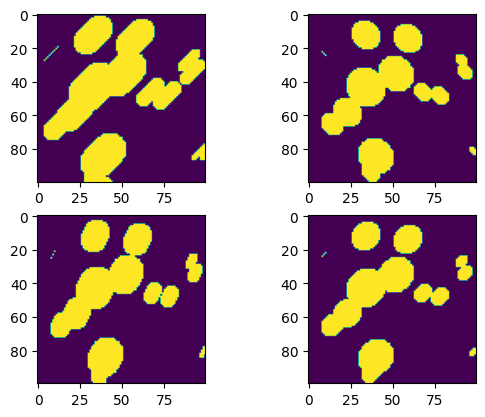

In [106]:
'''
fig, ax = plt.subplots(2, 6)

k, n = 0

for i in range(11):
    c = normalize_image(signal.convolve2d(data["environment"], data["rod"][i], boundary="symm", mode="same"))
    ax[k, n].imshow(c)
    if i % 2 == 0:
        k = 0
        n = 1
    else:
        
plt.show()

'''
c = normalize_image(signal.convolve2d(data["environment"], data["rod"][:,:,1], boundary="symm", mode="same"))
d = normalize_image(signal.convolve2d(data["environment"], data["rod"][6], boundary="symm", mode="same"))
e = normalize_image(signal.convolve2d(data["environment"], data["rod"][3], boundary="symm", mode="same"))
f = normalize_image(signal.convolve2d(data["environment"], data["rod"][4], boundary="symm", mode="same"))

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(c)
ax[0, 1].imshow(d)
ax[1, 0].imshow(e)
ax[1, 1].imshow(f)
plt.show()


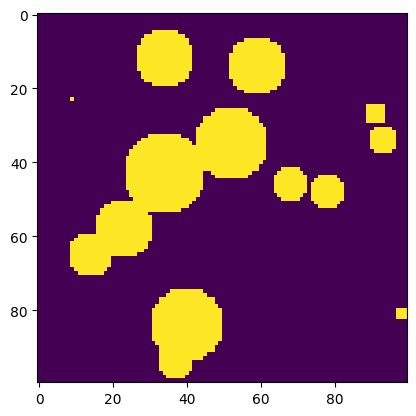

In [33]:
c = normalize_image(signal.convolve2d(data["environment"], data["rod"][0], boundary="symm", mode="same"))
c
plt.imshow(c)

## Point D

# Task 2

## Subtask A

You need to implement the A star algorithm and plan in the generated discrete C-space from the previous task. The starting configuration of the agent is (6,6,2) and the goal configuration is (55,55,0). On this first iteration, use an heuristic function h(q, qG) = 0, which is equivalent to the Dijkstra algorithm.

In [ ]:
# COMMETNS

def enqueue(p,
            config,
            cost,
           ):
    p.append((config, cost))
    return sorted(p, key=lambda tup: tup[1], reverse=True)

def dequeue(p
):
    #print("p in the def:", p)
    if not p:
        return None
    return p.pop()[0]

In [ ]:
#COMMENT

def returning(X_I,
              X_G, 
              dictionary,
             ):
    a = X_G
    b = 0
    s = [a]
    k = True
    while b != X_I:
        if k:
            b = a
            k = False
        b = dictionary[b][0]
        s.append(b)
    return s

In [ ]:
# COMMENTS

def set_neighbours(
    q
) -> typing.List[typing.List[int]]:
    cost = 0
    neighbours = []
    if q[0] > 6 and c_list[q[2]][q[0]-1, q[1]] != 1:
            neighbours.append([q[0]-1, q[1], q[2], cost+1])
    if q[0] < 94 and c_list[q[2]][q[0]+1, q[1]] != 1:
            neighbours.append([q[0]+1, q[1], q[2], cost+1])
    if q[1] > 6 and c_list[q[2]][q[0], q[1]-1] != 1:
            neighbours.append([q[0], q[1]-1, q[2], cost+1])
    if q[1] < 94 and c_list[q[2]][q[0], q[1]+1] != 1:
            neighbours.append([q[0], q[1]+1, q[2], cost+1])

    for j in [(q[2] - 1) % 4, (q[2] + 1) % 4]:
        if c_list[j][q[0], q[1]] == 0:
            neighbours.append([q[0], q[1], j, cost+1])

    return neighbours

In [ ]:
# COMMENTS

def Dijkstra(X_I,
                     X_G,
                    ):

    Q = []
    Q = enqueue(Q, X_I, 0)
    visited = np.zeros((100, 100, 4)) # 1 - visited, 0 - not visited 
    visited[X_I] = 1 
    queue = {X_I: (X_I, 0)} # state: (parent_state, C(state)) 
    states_visited = 0
    
    while Q:

        q = dequeue(Q)


        if q == X_G:
            return returning((6,6,2), (55,55,0), queue)

        for i in set_neighbours(q):
            c = (i[0], i[1], i[2])
            new_cost = queue[q][1] + i[3]           
            if visited[c] == 0:
                visited[c] = 1
                queue[c] = (q, new_cost)

                Q = enqueue(Q, c, new_cost)


            else:
                if queue[c][1] > new_cost:
                    queue[c] = (q, new_cost)

    return -1

In [ ]:
X_I = (6, 6, 2)
X_G = (55, 55, 0)

result = Dijkstra(X_I, X_G)
result.reverse()
result = tuple(result)
print(len(result))

## Subtask B

Change the heuristic function now to be h(q, qG) = L1 norm of the x, y components. Comment on the changes, how many states have been visited compared to Dijkstra? What is the final cost? Comment on the results.

In [ ]:
def A_star_algorithm_L1(X_I,
                     X_G,
                    ):

    Q = []
    Q = enqueue(Q, X_I, 0)
    visited = np.zeros((100, 100, 4)) # 1 - visited, 0 - not visited 
    visited[X_I] = 1 
    queue = {X_I: (X_I, 0)} # state: (parent_state, C(state)) 
    states_visited = 0
    
    while Q:

        q = dequeue(Q)


        if q == X_G:
            return returning((6,6,2), (55,55,0), queue)

        for i in set_neighbours(q):
            c = (i[0], i[1], i[2])
            new_cost = queue[q][1] + i[3]           
            if visited[c] == 0:
                visited[c] = 1

                queue[c] = (q, new_cost)
                
                norm_val = np.subtract([q[0], q[1]], [c[0], c[1]])
                h = np.linalg.norm(norm_val, ord=1)
                Q = enqueue(Q, c, new_cost+h)



            else:
                if queue[c][1] > new_cost:
                    queue[c] = (q, new_cost)

    return -1

In [ ]:
X_I = (6, 6, 2)
X_G = (55, 55, 0)

result = A_star_algorithm_L1(X_I, X_G)
result.reverse()
result = tuple(result)
print(len(result))

## Subtask C

Propose an heuristic function h(q, qG) that includes orientation. Compare metrics with the previous results. Comment on the results.

Visualization

In [ ]:
def plot_enviroment(img: np.ndarray, obj: np.ndarray, state: tuple):
    """
    @param img: original image in 2d
    @param obj: is the 3d array of different configurations
    @param state: is the current pose (x, y, orientation) of the object

    @return: the merged image
    """
    dims = obj.shape
    dim_x = int((dims[0] - 1) / 2)
    dim_y = int((dims[1] - 1) / 2)
    merged_img = np.copy(img)
    merged_img[state[0] - dim_x:state[0] + dim_x + 1, state[1] - dim_y:state[1] + dim_y + 1] += obj[:, :, state[2]] * 0.5
    return merged_img

def plotting_results(environment: np.ndarray, rod: np.ndarray, plan: list, save_path: str = 'rod_solve.gif'):
    """
    create an animation of the plan and save it to a file

    @param environment: the environment image in 2d
    @param rod: is the 3d array of different configuration
    @param plan: list of poses
    @param save_path: path to save the animation
    """

    fig = plt.figure()
    imgs = []

    for s in plan:
        im = plot_enviroment(environment, rod, s)
        plot = plt.imshow(im)
        imgs.append([plot])

    ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True)

    ani.save(save_path)

    plt.show()
    
plotting_results(data["environment"], data["rod"], result)